In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
#import tree_for_huffman

In [2]:
class TreeNode:
    def __init__(self,data,probability):
        self.data = data
        self.probability = probability
        self.children = []
        self.parent = None
        self.bit = None
        self.bit_sequence = False

    def add_child(self,child):
        child.parent = self
        self.children.append(child)

    def print_tree(self):
        spaces = ' ' * self.get_level() * 3
        prefix = spaces + "|__" if self.parent else ""
        print(prefix + self.data , self.probability,"Bit - ",self.bit,"Bit sequence - ",self.bit_sequence) 
        
        if self.children:
            for i in self.children:
                i.print_tree()

    def get_level(self):
        level = 0
        p = self.parent
        while p:
            level += 1
            p = p.parent
        return level
    def assign_bits(self):
        #assign bits to children
        # print(type(self.children))
        
        if self.children:
            self.children[0].bit = "1"
            self.children[1].bit = "0"
            for i in self.children:
                i.assign_bits()
                
    def assign_bit_sequence(self):
        # print(self.data)
        #handling the root node
        if not self.parent:
            for i in self.children:
                    i.assign_bit_sequence()
        if self.parent:
            self.bit_sequence = self.parent.bit_sequence + self.bit
            if self.children:
                for i in self.children:
                        i.assign_bit_sequence()
            else:
                self.bit_sequence = self.bit_sequence[1:]

    def get_leaf_values(self):

        if not self.children:
            #a leaf node
            return self.data,self.bit_sequence

        left_values = self.children[0].get_leaf_values()
        right_values = self.children[1].get_leaf_values()
        self.children[0].get_leaf_values()
        self.children[1].get_leaf_values()

        return left_values,right_values
def flatten_tuple(nested_tuple):
    flattened_list = []
    for element in nested_tuple:
        if isinstance(element, tuple):
            flattened_list.extend(flatten_tuple(element))
        else:
            flattened_list.append(element)
    tuples_list = []

    # for i in range(0, len(flattened_list), 2):
    #     tuples_list.append((flattened_list[i], flattened_list[i + 1]))
    # print(tuples_list)
    return flattened_list

def build_huffman_tree_from_leaves(leaves_):
    #creating leaf nodes for each symbol
    #A = 0.13 ,B = 0.26 ,C = 0.5 ,D =0.11
    # test = TreeNode("T",0.11)
    # symbol_1 = TreeNode("A",0.05)
    # symbol_2 = TreeNode("B",0.09)
    # symbol_3 = TreeNode("C",0.12)
    # symbol_4 = TreeNode("D",0.13)
    # symbol_5 = TreeNode("E",0.16)
    # symbol_6 = TreeNode("F",0.45)
    

    # leaves = [symbol_1,symbol_2,symbol_3,symbol_4,symbol_5,symbol_6]
    sorted_leaves = sorted(leaves_, key=lambda node: node.probability, reverse=True)
    # #now itteratively create the tree
    count = 1
    while len(sorted_leaves)>1:
        new_node_probability = sorted_leaves[-1].probability + sorted_leaves[-2].probability
        new_node = TreeNode(data= f"inter_{count}",probability=new_node_probability)
        new_node.add_child(sorted_leaves[-2])
        new_node.add_child(sorted_leaves[-1]) # does this order matter
        sorted_leaves = sorted_leaves[:-2]
        sorted_leaves.append(new_node)
        sorted_leaves = sorted(sorted_leaves, key=lambda node: node.probability, reverse=True)
        count = count + 1
    sorted_leaves[-1].bit_sequence = "X" 
    sorted_leaves[-1].assign_bits()
    sorted_leaves[-1].assign_bit_sequence()
    # sorted_leaves[-1].print_tree()
    flattened_list = flatten_tuple(sorted_leaves[-1].get_leaf_values())
    tuple_list = []
    for i in range(0, len(flattened_list), 2):
        tuple_list.append((flattened_list[i], flattened_list[i + 1]))
    flattened_list = tuple_list
    
    # print(flattened_list)
    return flattened_list

In [3]:
def quantinze(number,cropped):
    # image = cv2.imread("Pattern.jpg",cv2.IMREAD_GRAYSCALE)
    # image = image[0:16,124:(124+16)]
    image = cropped
    #quantice a number
    number_of_ranges = 7
    max_ = np.max(image)
    min_ = np.min(image)
    range_ = max_ - min_
    range_length = math.ceil(range_/number_of_ranges)
    updated_range = range_length*number_of_ranges
    value_to_add_for_range = updated_range - range_
    if (max_+ number_of_ranges) <= 255:
        max_ = max_ + value_to_add_for_range
    else:
        min_ = min_ - value_to_add_for_range
    quantized = None
    #find in which range the number is in
    #assign the quantized value 
    middle = min_ + (math.ceil((number-min_)/range_length)-1)*range_length + range_length/2 #middle value of the range it belongs
    if number<min_:
        quantized = min_
    elif number > max_:
        quantized = max_
    elif number < middle:
        quantized = min_ + (math.ceil((number-min_)/range_length)-1)*range_length
    else:
        quantized = min_ + (math.ceil((number-min_)/range_length))*range_length
    # print("min - ",min_)
    # print("max - ",max_)
    # print(quantized)
    return quantized

def quantize_image(image,reference):
    uniques = np.unique(image)
    new_arr = image
    for i in uniques:
        quantized_value = quantinze(i,reference)

        new_arr = np.where(new_arr == i, quantized_value, new_arr)
    return new_arr  



In [ ]:
# grayscale_image = cv2.imread("Pattern.jpg",cv2.IMREAD_GRAYSCALE) #grayscale image
# cropped_gray_scale = grayscale_image[0:16,124:(124+16)] #cropped gray scale
# rgb_image = cv2.imread("Pattern.jpg") #rgb image
# red_channel = rgb_image[:,:,2:3]
# plt.imshow(red_channel)

In [4]:
rgb_image = cv2.imread("Pattern.jpg") 
cropped_red_channel = rgb_image[0:16,124:(124+16),0:1] #cropped gray scale

In [5]:
new_arr = quantize_image(rgb_image,cropped_red_channel)

In [6]:
quantized_red = quantize_image(cropped_red_channel,cropped_red_channel)

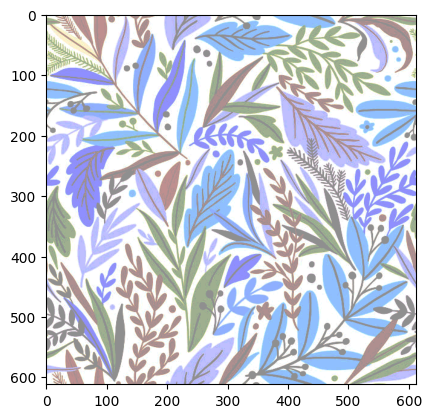

In [7]:
plt.imshow(new_arr)

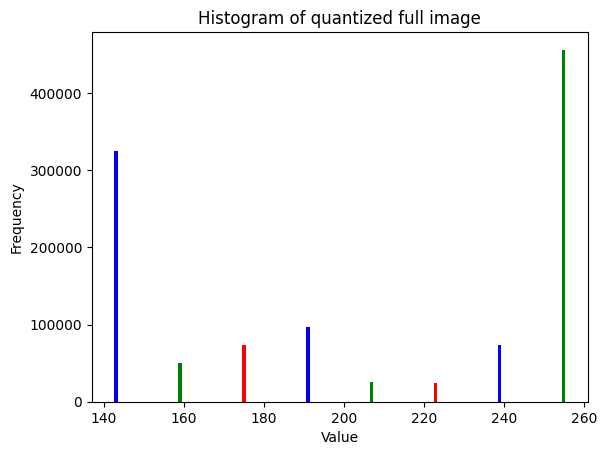

In [8]:
fig, ax = plt.subplots()
uniques,counts = np.unique(new_arr.flatten(),return_counts = True)
colors = ['blue', 'green', 'red'] 
plt.bar(uniques,counts,color=colors)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of quantized full image')
plt.show()

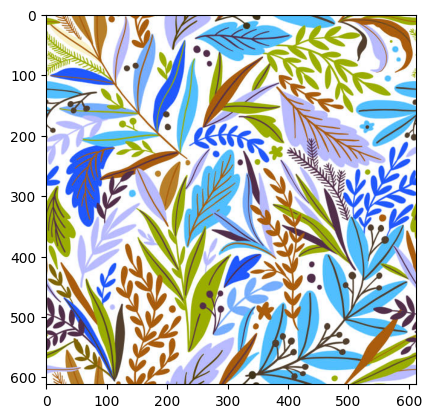

In [9]:
plt.imshow(rgb_image)

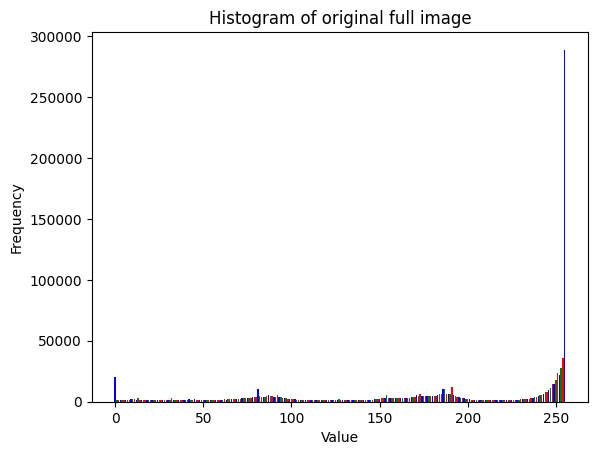

In [10]:
fig, ax = plt.subplots()
uniques,counts = np.unique(rgb_image.flatten(),return_counts = True)
colors = ['blue', 'green', 'red'] 
plt.bar(uniques,counts,color=colors)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of original full image')
plt.show()

Calculate probabilities

In [ ]:
# new_arr = np.reshape(new_arr,(16,16,1))
uniques,counts = np.unique(quantized_red,return_counts = True)
probabilities = counts/np.sum(counts)
print(uniques)
print(counts)
print(probabilities)
print(np.sum(probabilities))

Built in

In [ ]:
# import huffman
# #creating the dictionary
# symbols_dictionary = []
# for symbol_,prob in zip(uniques,probabilities):
#     tuple_ = (symbol_,prob)
#     symbols_dictionary.append(tuple_)
# print(symbols_dictionary)
# codebook_ = huffman.codebook(symbols_dictionary)
# print(codebook_)

In [ ]:
# test_ = []
# for i in codebook_.items():
#     tuple_ = (i[0],i[1])
#     test_.append(tuple_)
# print(test_)

create leaf nodes

In [ ]:
symbols_objects = []
for data,probabiliy in zip(uniques.tolist(),probabilities):
    leaf = TreeNode(str(data),probabiliy)
    symbols_objects.append(leaf)

In [ ]:
codes = build_huffman_tree_from_leaves(symbols_objects)
result = {}

for item in codes:
    result[item[0]] = item[1]
print(result)


In [ ]:
array_to_compress = new_arr.flatten()
bit_sequence = ""
for i in array_to_compress:
    symbol = result[str(i)]
    bit_sequence = bit_sequence + symbol
print(bit_sequence)

In [ ]:
print(len(bit_sequence))

In [ ]:
def save_string_to_file(string, filename):
    with open(filename, 'w') as f:
        f.write(string)
save_string_to_file(bit_sequence,"huffman_coded.txt")

In [ ]:
test_ = {}
for i in result.items():
    test_.update({i[1]:i[0]})
print(test_)


In [ ]:
with open('huffman_coded_full.txt', 'r') as f:
    bit_sequence_2 = f.read()
print(len(bit_sequence_2))

In [ ]:
decoded_values = []
current_code = ''

for bit in bit_sequence_2:
    current_code += bit

    if current_code in test_:
        print(test_[current_code])
        decoded_values.append(int(test_[current_code]))
        current_code = ''

In [ ]:
for i in range(0,len(bit_sequence_2)):
    print(i)

In [ ]:
print(len(decoded_values))

Decode

In [ ]:
# decoded_values = []

# print("len - ",len(bit_sequence))
# while bit_sequence:
#     for codeword, value in result.items():
#         if bit_sequence.startswith(value):
#             # print(codeword)
#             decoded_values.append(int(codeword))
#             bit_sequence = bit_sequence[len(value):]
#             # break
# decoded_values = np.array(decoded_values)
# print(decoded_values.shape)
# decoded_values = np.reshape(decoded_values,(16,16,1))


In [ ]:
decoded_values = np.reshape(decoded_values,(612,612,3))
plt.imshow(decoded_values)

In [ ]:
decoded_values = decoded_values.astype(np.uint8)

Entropy

In [ ]:
#original
uniques,counts = np.unique(rgb_image,return_counts = True)
probabilities = counts/np.sum(counts)
entropy = -np.sum(probabilities * np.log2(probabilities))
print(entropy)

In [ ]:
#cropped
uniques,counts = np.unique(cropped_gray_scale,return_counts = True)
probabilities = counts/np.sum(counts)
entropy = -np.sum(probabilities * np.log2(probabilities))
print(entropy)

In [ ]:
#decompressed
uniques,counts = np.unique(decoded_values,return_counts = True)
probabilities = counts/np.sum(counts)
entropy = -np.sum(probabilities * np.log2(probabilities))
print(entropy)

Average length

In [ ]:
psnr = cv2.PSNR(rgb_image, rgb_image)
print("PSNR:", psnr)

In [ ]:
psnr = cv2.PSNR(decoded_values, decoded_values)
print("PSNR:", psnr)

In [ ]:
def psnr(image1, image2):

    
# Convert the images to grayscale
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Calculate the mean squared error (MSE)
    mse = np.mean((image1 - image2) ** 2)

    # Check if the MSE is zero
    if mse == 0:
        return float('inf')

    # Calculate the PSNR
    psnr = 10 * np.log10(255 ** 2 / mse)

    return psnr

In [ ]:
psnr_value = psnr(rgb_image, decoded_values)

# Print the PSNR value
print(psnr_value)

In [ ]:
print(decoded_values.shape)

average length

In [ ]:
uniques,counts = np.unique(decoded_values,return_counts = True)
probabilities = counts/np.sum(counts)
average_length = 0
for unique,prob in zip(uniques,probabilities):
    code_length = len(result[str(unique)])
    average_length = average_length + code_length*prob
print(average_length)

In [ ]:
#Step 2
image = cv2.imread("Pattern.jpg") #read the image as rgb
cropped_red_channel = image[0:16,124:(124+16),0:1] #huffman code and quantizations are generated for this
cropped_rgb = image[0:16,124:(124+16),:]
plt.imshow(cropped_rgb)

In [ ]:
quantized_cropped = np.vectorize(lambda x: quantinze(x,cropped_red_channel))(cropped_rgb).astype(np.uint8)
plt.imshow(quantized_cropped)


In [ ]:
fig, ax = plt.subplots()
uniques,counts = np.unique(quantized_cropped.flatten(),return_counts = True)
print(uniques)
print(counts)
colors = ['blue', 'green', 'red'] 
plt.bar(uniques,counts,color = colors)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the quntized cropped image intensities')
plt.show()

In [ ]:
fig, ax = plt.subplots()
uniques,counts = np.unique(cropped_rgb.flatten(),return_counts = True)
colors = ['blue', 'green', 'red'] 
plt.bar(uniques,counts,color = colors)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the cropped image intensities')
plt.show()